In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [161]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display, display_html

from sklearn import linear_model
from sklearn.linear_model import Ridge, SGDRegressor, LassoLars , PassiveAggressiveRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline, Pipeline
import category_encoders as ce
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
import shap
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

### Область работы 2 (поиск  модели .... )

In [185]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'# содержит только имя файла, без имен папок !!!

In [186]:
df = pd.read_csv(path_train)
df.head(5)

,BCS,Age,Sex,Length,Girth,Height,Weight
0,3.0,5-10,stallion,99,114,100,152
1,3.0,5-10,female,91,123,97,173
2,3.0,10-15,gelding,99,123,106,171
3,2.5,2-5,female,92,105,96,121
4,3.0,<2,female,86,105,92,100


In [187]:
X = df.drop(['Weight'], axis=1)
y = df['Weight']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
X_train.head(3)
df['Age'].unique()

array(['5-10', '10-15', '2-5', '<2', '15-20', '>20'], dtype=object)

In [203]:
Age_map = [{
    'col':'Age',##### Обратить внимание
    'mapping':{'>20': 5,'15-20': 4,'10-15':3,'5-10':2, '2-5':1, '<2':0}
    }]

Age_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy = 'most_frequent')),
    ('ce',ce.OrdinalEncoder(mapping=Age_map)),
    ('scaler', MinMaxScaler())
    ])    
sex_transformer = Pipeline(steps=[
    ('missing_num', SimpleImputer(strategy='most_frequent')),
    ('ce',OneHotEncoder(sparse_output=False)),
   # ('scaler', MinMaxScaler())
    ])   
num = ['Length', 'Girth', 'Height']
num_transformer = Pipeline(steps=[
  #  ('missing_num', SimpleImputer(strategy='most_frequent')),
 #   ('ce',OneHotEncoder(sparse_output=False)),
    ('polynom', PolynomialFeatures(3,include_bias=False, interaction_only = True)),
    ('scaler', MinMaxScaler())
    ])  
bcs = ['BCS', 'Length', 'Girth', 'Height']
bcs_transformer = Pipeline(steps=[
  #  ('missing_num', SimpleImputer(strategy='most_frequent')),
 #   ('ce',OneHotEncoder(sparse_output=False)),
    #('polynom', PolynomialFeatures(2,include_bias=False, interaction_only = True)),
    ('scaler', StandardScaler())
    ])  
CT = ColumnTransformer([
        ("Age", Age_transformer, ['Age']),# убрать быстую разряженную 
        ("Sex", sex_transformer, ['Sex']),
        ("num", num_transformer, num),
        ("bcs", bcs_transformer, bcs),    
        ]).set_output(transform='pandas')

display(CT)

ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(transformers=[('Age',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'Age',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': >20      5
15-20    4
10-15    3
5-10     2
2-5      1
<2       0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age']),
                                ('Sex',
                                 Pipeline(steps=[('missing_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ce',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Sex']),
                                ('num',
                                 Pipeline(steps=[('polynom',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False,
                                                                     interaction_only=True)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Length', 'Girth', 'Height']),
                                ('bcs',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['BCS', 'Length', 'Girth', 'Height'])])

,194,81,45,47,217
Age__Age,0.200000,0.200000,0.600000,0.400000,0.600000
Sex__Sex_female,0.000000,1.000000,1.000000,1.000000,1.000000
Sex__Sex_gelding,1.000000,0.000000,0.000000,0.000000,0.000000
Sex__Sex_stallion,0.000000,0.000000,0.000000,0.000000,0.000000
num__Length,0.818182,0.787879,0.803030,0.848485,0.818182
num__Girth,0.691176,0.691176,0.764706,0.691176,0.705882
num__Height,0.809524,0.666667,0.738095,0.738095,0.690476
num__Length Girth,0.711433,0.691977,0.744318,0.730888,0.720041
num__Length Height,0.798896,0.710768,0.754500,0.788294,0.743678
num__Girth Height,0.714044,0.646608,0.731052,0.680326,0.667794


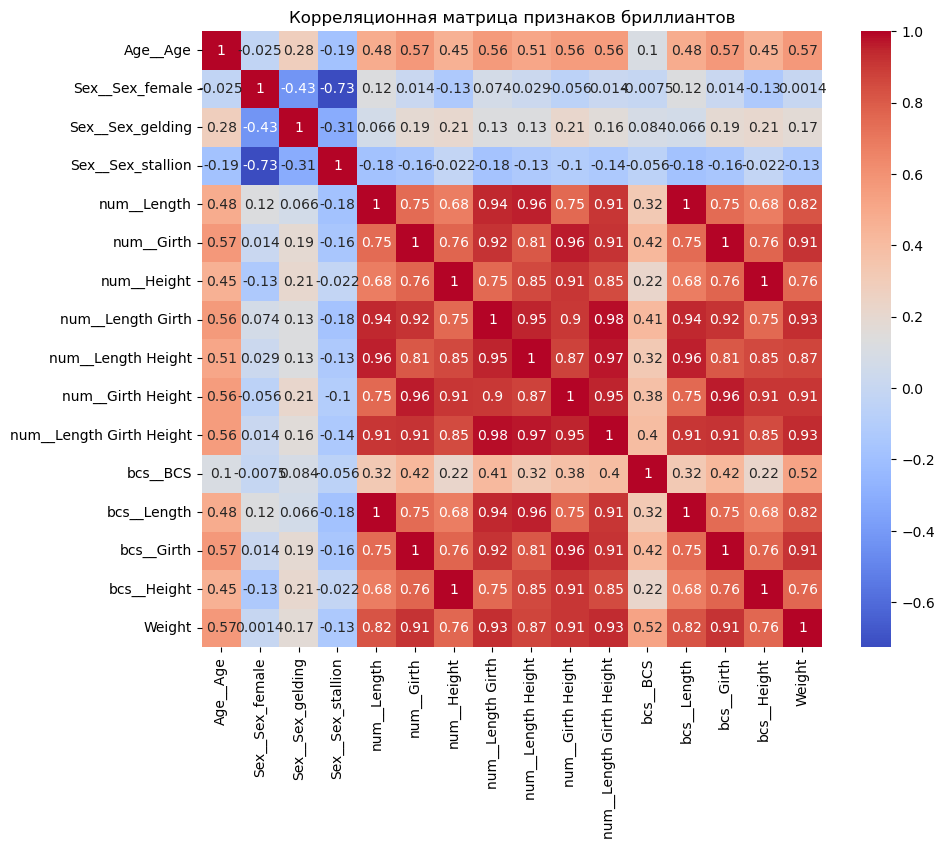

Корреляции с ценой:
Age__Age                    0.571586
Sex__Sex_female             0.001445
Sex__Sex_gelding            0.173586
Sex__Sex_stallion          -0.133565
num__Length                 0.820515
num__Girth                  0.912664
num__Height                 0.759617
num__Length Girth           0.929278
num__Length Height          0.869950
num__Girth Height           0.909260
num__Length Girth Height    0.933775
bcs__BCS                    0.523630
bcs__Length                 0.820515
bcs__Girth                  0.912664
bcs__Height                 0.759617
Weight                      1.000000
Name: Weight, dtype: float64


In [204]:
corrt = ct
corrt['Weight'] = df['Weight']
correlation_matrix = ct.corr()

# Визуализируйте корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица признаков бриллиантов")
plt.show()

# Выведите корреляции с ценой
print("Корреляции с ценой:")
print(correlation_matrix['Weight'])

In [205]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('estimator',RandomForestRegressor(n_estimators=1000))
])
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
mean_squared_error(y_test, y_predict)

61.021800936842126

**60.91882869473685**

In [206]:
boost = Pipeline(steps=[
  ('preproc', CT),
 # ('pca', PCA(n_components=0.9)),
  ('gbr', GradientBoostingRegressor(n_estimators = 100,learning_rate = 0.05, min_samples_split = 2 ))
])
boost.fit(X_train, y_train)

# 6. Делаем предсказания на тестовых данных
y_pred = boost.predict(X_test)

# 7. Оцениваем модель
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE on test data:", mse)

MSE on test data: 61.994897896980305


**57.21338598342558**

In [207]:
pipeline = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Ridge())
])

param_grid = {
    'estimator__alpha': [0.01, 0.05, 0.07, 0.1, 0.15, 0.2, 0.5, 1.0],
    'estimator__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']  
}


grid_search = GridSearchCV(pipeline, param_grid, cv=7, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)
best_model
grid_result_ridge = pd.DataFrame(grid_search.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_ridge

Лучшие параметры: {'estimator__alpha': 0.01, 'estimator__solver': 'auto'}


,0,2,1,4,3,9,8,5,7,6,...,33,34,30,32,31,38,39,35,37,36
mean_fit_time,0.046876,0.049155,0.050153,0.038466,0.039894,0.034907,0.040178,0.043595,0.049156,0.047019,...,0.037605,0.034205,0.042743,0.044169,0.045166,0.051292,0.04773,0.041751,0.045157,0.041605
std_fit_time,0.002611,0.005323,0.005269,0.002917,0.004768,0.001599,0.005188,0.003407,0.005929,0.004568,...,0.004612,0.000698,0.001802,0.005933,0.004639,0.005836,0.00241,0.005166,0.007783,0.007738
mean_score_time,0.02536,0.024648,0.02308,0.019523,0.021372,0.017097,0.02009,0.02251,0.023793,0.021799,...,0.016397,0.017378,0.021804,0.023222,0.021372,0.025361,0.022941,0.022079,0.022943,0.020088
std_score_time,0.000901,0.002906,0.00339,0.003926,0.00409,0.000831,0.003554,0.003009,0.002581,0.002635,...,0.000499,0.001392,0.001954,0.004118,0.00219,0.002659,0.000753,0.004573,0.003409,0.002688
param_estimator__alpha,0.01,0.01,0.01,0.01,0.01,0.05,0.05,0.05,0.05,0.05,...,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0
param_estimator__solver,auto,cholesky,svd,sparse_cg,lsqr,sparse_cg,lsqr,auto,cholesky,svd,...,lsqr,sparse_cg,auto,cholesky,svd,lsqr,sparse_cg,auto,cholesky,svd
params,"{'estimator__alpha': 0.01, 'estimator__solver'...","{'estimator__alpha': 0.01, 'estimator__solver'...","{'estimator__alpha': 0.01, 'estimator__solver'...","{'estimator__alpha': 0.01, 'estimator__solver'...","{'estimator__alpha': 0.01, 'estimator__solver'...","{'estimator__alpha': 0.05, 'estimator__solver'...","{'estimator__alpha': 0.05, 'estimator__solver'...","{'estimator__alpha': 0.05, 'estimator__solver'...","{'estimator__alpha': 0.05, 'estimator__solver'...","{'estimator__alpha': 0.05, 'estimator__solver'...",...,"{'estimator__alpha': 0.5, 'estimator__solver':...","{'estimator__alpha': 0.5, 'estimator__solver':...","{'estimator__alpha': 0.5, 'estimator__solver':...","{'estimator__alpha': 0.5, 'estimator__solver':...","{'estimator__alpha': 0.5, 'estimator__solver':...","{'estimator__alpha': 1.0, 'estimator__solver':...","{'estimator__alpha': 1.0, 'estimator__solver':...","{'estimator__alpha': 1.0, 'estimator__solver':...","{'estimator__alpha': 1.0, 'estimator__solver':...","{'estimator__alpha': 1.0, 'estimator__solver':..."
split0_test_score,-96.786445,-96.786445,-96.786445,-96.397632,-96.787732,-97.591664,-97.662618,-97.662577,-97.662577,-97.662577,...,-102.24974,-102.24974,-102.252397,-102.252397,-102.252397,-103.527184,-103.527184,-103.527918,-103.527918,-103.527918
split1_test_score,-56.528724,-56.528724,-56.528724,-56.496792,-56.496777,-56.700267,-56.700242,-56.706011,-56.706011,-56.706011,...,-59.106343,-59.106349,-59.106812,-59.106812,-59.106812,-59.974598,-59.9746,-59.974747,-59.974747,-59.974747
split2_test_score,-80.494287,-80.494287,-80.494287,-80.656606,-80.656616,-80.390616,-80.390605,-80.362385,-80.362385,-80.362385,...,-80.620729,-80.620734,-80.619865,-80.619865,-80.619865,-80.84815,-80.848152,-80.847925,-80.847925,-80.847925


In [208]:
Rridge = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Ridge(alpha=0.05)) 
])
Rridge.fit(X_train, y_train)
y_predict = Rridge.predict(X_test)
mean_squared_error(y_test, y_predict)

61.29683451411334

**55.64503410723652**

In [209]:
Rridge = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Ridge(alpha=0.1)) 
])
Rridge.fit(X_train, y_train)
y_predict = Rridge.predict(X_test)
mean_squared_error(y_test, y_predict)

61.03780656245908

In [210]:
Rridge = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', Ridge(alpha=0.07)) 
])
Rridge.fit(X_train, y_train)
y_predict = Rridge.predict(X_test)
mean_squared_error(y_test, y_predict)

61.16949251314559

In [211]:
ssvr = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', SVR())
])

param_grid_svr = {
     'estimator__C': [1, 10, 30, 50, 80, 100, 150, 200, 300],
     'estimator__gamma': [0.01, 0.02, 0.05, 0.07, 0.1]
}
    

grid_svr = GridSearchCV(ssvr, n_jobs=-1, param_grid=param_grid_svr, return_train_score=True, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(X_train, y_train)

grid_result_svr = pd.DataFrame(grid_svr.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
display(grid_result_svr)


,40,30,35,25,20,15,10,31,36,26,...,39,7,44,8,9,2,3,4,1,0
mean_fit_time,0.104879,0.077255,0.10534,0.073437,0.06096,0.089606,0.067777,0.066276,0.123546,0.062043,...,0.091923,0.093465,0.083435,0.075894,0.07132,0.063684,0.058103,0.060753,0.085064,0.08966
std_fit_time,0.004472,0.003497,0.006332,0.005972,0.00469,0.014817,0.003015,0.003445,0.003932,0.001941,...,0.01721,0.010239,0.005423,0.013602,0.01001,0.006554,0.002977,0.008384,0.008072,0.018051
mean_score_time,0.036335,0.036238,0.048516,0.035512,0.030954,0.036429,0.03315,0.030733,0.048231,0.033731,...,0.043017,0.056824,0.035535,0.035563,0.033849,0.03086,0.030955,0.032649,0.038461,0.049642
std_score_time,0.0039,0.004157,0.003398,0.005146,0.003636,0.003959,0.003496,0.002926,0.00661,0.0092,...,0.009155,0.008337,0.003149,0.001059,0.003316,0.001454,0.004777,0.003728,0.007689,0.011836
param_estimator__C,300,150,200,100,80,50,30,150,200,100,...,200,10,300,10,10,1,1,1,1,1
param_estimator__gamma,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,...,0.1,0.05,0.1,0.07,0.1,0.05,0.07,0.1,0.02,0.01
params,"{'estimator__C': 300, 'estimator__gamma': 0.01}","{'estimator__C': 150, 'estimator__gamma': 0.01}","{'estimator__C': 200, 'estimator__gamma': 0.01}","{'estimator__C': 100, 'estimator__gamma': 0.01}","{'estimator__C': 80, 'estimator__gamma': 0.01}","{'estimator__C': 50, 'estimator__gamma': 0.01}","{'estimator__C': 30, 'estimator__gamma': 0.01}","{'estimator__C': 150, 'estimator__gamma': 0.02}","{'estimator__C': 200, 'estimator__gamma': 0.02}","{'estimator__C': 100, 'estimator__gamma': 0.02}",...,"{'estimator__C': 200, 'estimator__gamma': 0.1}","{'estimator__C': 10, 'estimator__gamma': 0.05}","{'estimator__C': 300, 'estimator__gamma': 0.1}","{'estimator__C': 10, 'estimator__gamma': 0.07}","{'estimator__C': 10, 'estimator__gamma': 0.1}","{'estimator__C': 1, 'estimator__gamma': 0.05}","{'estimator__C': 1, 'estimator__gamma': 0.07}","{'estimator__C': 1, 'estimator__gamma': 0.1}","{'estimator__C': 1, 'estimator__gamma': 0.02}","{'estimator__C': 1, 'estimator__gamma': 0.01}"
split0_test_score,-96.982739,-100.098438,-98.488524,-101.079276,-100.636403,-100.537884,-102.569063,-97.744881,-97.54134,-99.623932,...,-122.61161,-110.877044,-127.164759,-108.172474,-107.724947,-211.145737,-201.122332,-208.177948,-296.799774,-412.786775
split1_test_score,-80.32814,-81.067537,-80.905069,-81.31639,-79.611886,-77.828084,-79.684659,-81.768725,-79.383116,-85.522334,...,-73.977901,-118.788876,-74.612605,-128.253603,-141.113598,-312.333094,-332.110503,-363.130568,-387.79253,-513.029731
split2_test_score,-50.946491,-49.042714,-50.182025,-49.024118,-50.00198,-50.336208,-52.436937,-50.171228,-50.109444,-51.339926,...,-59.814811,-59.414653,-66.974286,-60.199547,-61.857006,-180.018779,-174.841688,-181.899674,-285.009474,-396.498962


In [212]:
ssvr = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', SVR(C = 200, gamma = 0.05))
])
ssvr.fit(X_train, y_train)
y_predict = ssvr.predict(X_test)
mean_squared_error(y_test, y_predict)

56.90829193540527

**65.625358372179**

In [213]:
lr = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', LinearRegression())
])
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
mean_squared_error(y_test, y_predict)

63.207975997281814

**56.48086141376255**